In [2]:
import pandas as pd
import numpy as np
import os
os.chdir("C:/Users/LOTACHIM EHIEZE/Documents/Master_notes/archive (1)")

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import *
import bokeh.io

In [228]:
stad = pd.read_csv("Football Stadiums.csv")

                               DATA EXPLORATION AND VISUALIZATIONS

In [229]:
stad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2024 entries, 0 to 2023
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Confederation  2024 non-null   object
 1   Stadium        2024 non-null   object
 2   City           2024 non-null   object
 3   HomeTeams      2024 non-null   object
 4   Capacity       2024 non-null   int64 
 5   Country        2024 non-null   object
 6   IOC            2024 non-null   object
 7   Population     2024 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 126.6+ KB


The dataset contains eight variables.

Confederation, Stadium, City, Hometeam, Country and IOC are categorical variables. 

Capacity and Population are both discrete numerical variables.

The dataset contains 2024 observations. 

Data such as City and IOC are not useful for this analysis, but can be used for filtering.

In [230]:
stad.describe()

,Capacity,Population
count,2024.000000,2.024000e+03
mean,22905.075099,9.964931e+07
std,20728.566347,2.326112e+08
min,244.000000,3.219400e+04
25%,7477.750000,1.029103e+07
50%,16408.000000,3.843360e+07
75%,32004.750000,8.081052e+07
max,153000.000000,1.403500e+09


In this dataset, the smallest stadium capacity is 244 people, while the largest stadium capacity is 153000 people. The average stadium capacity is 22905 people. 

Also, the largest population is 1,403,500,000 people, the smallest population is 32,194 people and the average population is 99,649,310 people.  

In [231]:
stad.head()

,Confederation,Stadium,City,HomeTeams,Capacity,Country,IOC,Population
0,UEFA,Stadiumi Besëlidhja,Lezhë,Besëlidhja,7000,Albania,ALB,2876591
1,UEFA,Stadiumi Flamurtari,Vlorë,Flamurtari Vlorë,8200,Albania,ALB,2876591
2,UEFA,Stadiumi Laçi,Laçi,KF Laçi,5000,Albania,ALB,2876591
3,UEFA,Stadiumi Niko Dovana,Durrës,Teuta,12040,Albania,ALB,2876591
4,UEFA,Stadiumi Selman Stërmasi,Tirana,"KF Tirana, Dinamo, Partizani",9500,Albania,ALB,2876591


In [232]:
stad.isnull().sum() #check for any null values in the df

Confederation    0
Stadium          0
City             0
HomeTeams        0
Capacity         0
Country          0
IOC              0
Population       0
dtype: int64

In [233]:
print(stad['Confederation'].value_counts()) #exploring the data to know the spread of observations accross the confederations. 

Confederation
UEFA        1364
AFC          252
CONCACAF     190
CONMEBOL     124
CAF           91
OFC            3
Name: count, dtype: int64


UEFA is the governing body for football in Europe, AFC for Asia, CONCACAF for North America, CONMEBOL for South America, CAF for Africa and OFC for Oceania. 

In [234]:
print(stad['Country'].value_counts()) #checking to see the countries with the most stadiums. 

Country
Poland                      242
United States of America    126
England                     116
Germany                      98
Spain                        72
                           ... 
Butan                         1
Cambodia                      1
Rwanda                        1
Cameroon                      1
Ivory Coast                   1
Name: count, Length: 129, dtype: int64


Poland has the most stadiums in the dataset, with 242 stadiums while there are a number of countries that have just one stadium.

In [235]:
print(stad['City'].nunique())

1544


In [238]:
print (stad['Country'].nunique()) #checked to see the number of countries this df covers. 


129


There are 195 countries in the world and this df covers more than half the countries. 

In [47]:
stad.set_index(['Confederation' , 'Country']) #set the indexes to the confederation and the country.
stad.head(30)

,Confederation,Stadium,City,HomeTeams,Capacity,Country,IOC,Population
0,UEFA,Stadiumi Besëlidhja,Lezhë,Besëlidhja,7000,Albania,ALB,2876591
1,UEFA,Stadiumi Flamurtari,Vlorë,Flamurtari Vlorë,8200,Albania,ALB,2876591
2,UEFA,Stadiumi Laçi,Laçi,KF Laçi,5000,Albania,ALB,2876591
3,UEFA,Stadiumi Niko Dovana,Durrës,Teuta,12040,Albania,ALB,2876591
4,UEFA,Stadiumi Selman Stërmasi,Tirana,"KF Tirana, Dinamo, Partizani",9500,Albania,ALB,2876591
5,UEFA,Stadiumi Skënderbeu,Korçë,Skënderbeu,7500,Albania,ALB,2876591
6,CAF,Stade 1er Novembre 1954,Tizi Ouzu,JSK,20000,Algeria,ALG,42200000
7,CAF,Stade Ahmed Zabana,Oran,MC Oran,40000,Algeria,ALG,42200000
8,CAF,Stade Amar Hareche,El Eulma,MCEE,5000,Algeria,ALG,42200000
9,CAF,Stade de l'Unité Maghrébine,Béjaïa,"MO Béjaïa, JSM Béjaïa",22000,Algeria,ALG,42200000


In [49]:
stad.replace('-' , np.nan , inplace = True) #replacing missing values with NaN.

In [50]:
columns_with_nan = stad.columns[stad.isna().any()].tolist()#checking out which columns have NaN values in them

In [51]:
columns_with_nan

['HomeTeams']

In [52]:
rows_with_nan = stad[stad['HomeTeams'].isna()] #checking out which rows under Hometeams have nan in them
rows_with_nan

,Confederation,Stadium,City,HomeTeams,Capacity,Country,IOC,Population
14,CAF,Estádio 11 de Novembro,Kilamba Kiaxi,NaN,50000,Angola,ANG,25789024
28,CONMEBOL,Estadio Malvinas Argentinas,Mendoza,NaN,40268,Argentina,ARG,43847430
30,CONMEBOL,Estadio Mario Alberto Kempes,Cordoba,NaN,57000,Argentina,ARG,43847430
34,CONMEBOL,Estadio Único,Villa Mercedes,NaN,28000,Argentina,ARG,43847430
42,AFC,ANZ Stadium,Sydney,NaN,83500,Australia,AUS,25150200
...,...,...,...,...,...,...,...,...
1964,CONCACAF,RFK Stadium,Washington,NaN,56692,United States of America,USA,325719178
1975,CONCACAF,Stadium Bowl,Tacoma,NaN,15000,United States of America,USA,325719178
1998,CONMEBOL,Estadio Centenario,Montevideo,NaN,65235,Uruguay,URU,3444006
2015,AFC,My Dinh Stadium,Hanoi,NaN,40192,Vietnam,VIE,94569072


In [123]:
#204 enteries do not have HomeTeams. No action will be made to these enteries because this does not affect the Analysis

In [124]:
stad.to_csv("C:/Users/LOTACHIM EHIEZE/Documents/Master_notes/archive (1)/stadcleaned.csv") #Saved the cleaned DF into a csv file that will be deployed into an API

                                               VISUALIZATIONS

<Axes: xlabel='Confederation', ylabel='Count'>

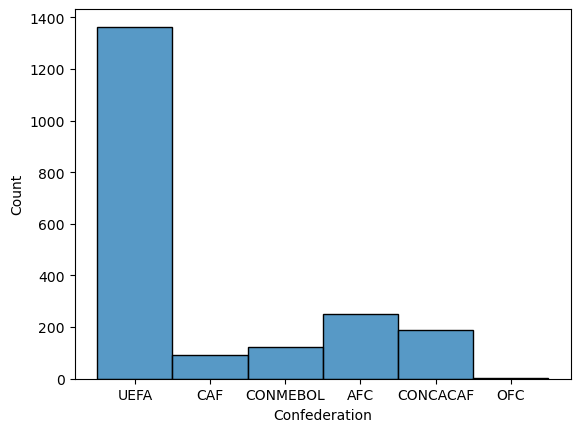

In [56]:
sns.histplot(stad['Confederation'] , bins =20)

from this plot, I can see that majority of the stadiums are in Europe(UEFA). Oceania(OFC) has the least stadiums. There are more stadiums in europe than all the other continents combined. 

<Axes: xlabel='Population', ylabel='Capacity'>

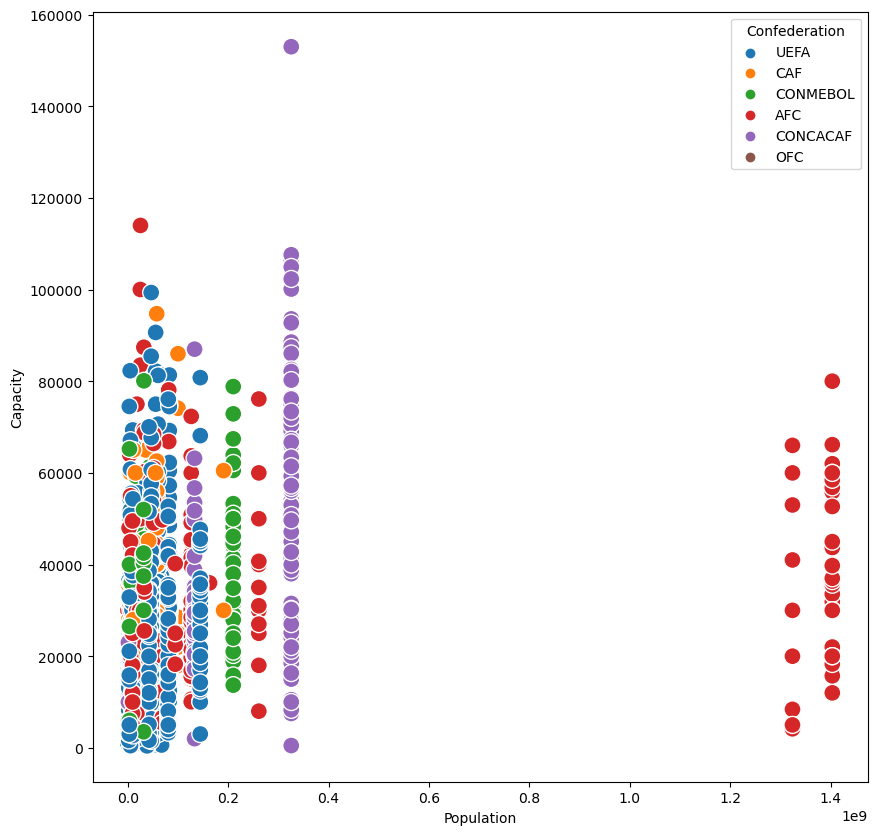

In [57]:
plt.figure(figsize = (10,10)) # A plot to show the relationship between the population of the countries and their stadium capacities.
sns.scatterplot(x = 'Population' , y = 'Capacity' , hue = 'Confederation' , s = 150, data = stad )

From the plot, I can see that there is a major population difference between some countries in the AFC confederation compared to other countries in the dataframe. 

It can also be seen that the stadium with the largest capacity is in the CONCACAF federation, and the Country with the largest population is a part of the AFC confederation (Asia). 

I decided that I will also need to be able so single out those countries that show clear differences. So I need to add a fourth parameter to the plot. I will do that using a bokkeh plot. 

In [240]:
from bokeh.models import HoverTool
from bokeh.transform import factor_cmap
from bokeh.palettes import Category10
# Create a scatter plot
conf = stad['Confederation'].unique()
p = figure(title="Stadium Capacities vs. Population", x_axis_label='Country Population', y_axis_label='Stadium Capacity' , width = 800 , height = 800)
colormap = factor_cmap('Confederation' , palette = Category10[6] , factors = conf)
p.circle('Population', 'Capacity', size=4, source = stad , legend_field = 'Confederation' , fill_color = colormap)

# hover tool to give more description to the points in the plot.
hover = HoverTool()
hover.tooltips = [
    ("Country", "@Country"),
    ("City", "@City"),
    ("Stadium" , "@Stadium"),
    ("Home Team" , "@HomeTeams"),
    ("Population", "@Population"),
    ("Average Capacity", "@Capacity"),
    ("Confederation", "@Confederation"),
  
    
]
p.add_tools(hover)

 #from first glance at the plot, I realized the scale cant be changed to make it more visible, so I decided to add a widget that helps select which confederation to view on the plot.
#confederations = ['All Confederations'] + source.data['Confederation'].unique().tolist()
#confederation_select = Select(title="Select Confederation", options=confederations, value='All Confederations')

# Define a function that changes the plot after a confederatoin
#def update_plot(attrname, old, new):
    #selected_confederation = confederation_select.value
    #if selected_confederation == 'All':
        #source.data = stad
    #else:
        #filtered_data = {key: val for key, val in stad.items() if key != 'Country' and stad['Confederation'] == selected_confederation}
        #source.data = filtered_data

#confederation_select.on_change('value', update_plot)

# Arrange the layout
#layout = column(confederation_select, p)


show(p)

From this plot, I can now verify that stadium with the most capacity is located in Bristol, United states. I can also see that China is the most populous country in the dataset. 

In [115]:
stadnum = stad.groupby('Country')['Stadium'].count().reset_index() #getting the list of countries and the number of stadi in them. 
print(stadnum)


        Country  Stadium
0       Albania        6
1       Algeria        8
2        Angola        4
3     Argentina       18
4       Armenia        4
..          ...      ...
124     Uruguay        4
125  Uzbekistan        3
126   Venezuela       10
127     Vietnam        4
128       Wales        7

[129 rows x 2 columns]


In [222]:
stadnum[stadnum.Stadium == 1].count() #There are 23 countries in the dataset with just one stadium in them.

Country    23
Stadium    23
dtype: int64

In [116]:
pop = stad[['Country' , 'Population' , 'Confederation']].drop_duplicates() #created a new df taking away dupplicate enteries, for comparison.
pop

,Country,Population,Confederation
0,Albania,2876591,UEFA
6,Algeria,42200000,CAF
14,Angola,25789024,CAF
18,Argentina,43847430,CONMEBOL
36,Armenia,2924816,UEFA
...,...,...,...
1996,Uruguay,3444006,CONMEBOL
2000,Uzbekistan,32979000,AFC
2003,Venezuela,31568179,CONMEBOL
2013,Vietnam,94569072,AFC


In [117]:
merged_df = pd.merge(pop , stadnum , on = 'Country') #merged the two dataframes by the country column becuase its the same in the two of them.
merged_df
#sns.scatterplot(x = 'Population' , y ='Stadium' , hue ='Country', source = merged_df)

,Country,Population,Confederation,Stadium
0,Albania,2876591,UEFA,6
1,Algeria,42200000,CAF,8
2,Angola,25789024,CAF,4
3,Argentina,43847430,CONMEBOL,18
4,Armenia,2924816,UEFA,4
...,...,...,...,...
124,Uruguay,3444006,CONMEBOL,4
125,Uzbekistan,32979000,AFC,3
126,Venezuela,31568179,CONMEBOL,10
127,Vietnam,94569072,AFC,4


Now I have a dataframe containing the population of the countries and the number of stadi in them

In [118]:
#creating a scatterplot in bokeh to compare the number of stadi in a country to the population of the country. 

In [205]:
#using the color map and already defined functions from the previous plot.
conf1 = merged_df['Confederation'].unique()
colormap1 = factor_cmap('Confederation' , palette = Category10[6] , factors = conf1)
d = figure(title="Number of Stadiums vs. Country Population", x_axis_label='Country Population', y_axis_label='Number of Stadiums')
d.scatter( x = 'Population' ,y = 'Stadium' , source = merged_df , legend_field = 'Confederation' , fill_color = colormap1 , size = 10 )

hover = HoverTool()
hover.tooltips = [
    ("Country", "@Country"),
    ("Stadium" , "@Stadium"),
    ("Population", "@Population"),
    ("Confederation", "@Confederation"),
  
    
]
d.add_tools(hover)

show(d)



From this plot, I can see that poland has the most stadiums and Gibraltar is the smallest country by population and they have just one stadium.

I want to make a plot to compare the average stadium capacity for each country by the population of the country.

In [168]:
avcap = stad.groupby('Country').Capacity.mean()
avcap

Country
Albania        8206.666667
Algeria       18250.000000
Angola        31250.000000
Argentina     41476.444444
Armenia       20080.250000
                  ...     
Uruguay       34435.000000
Uzbekistan    31506.666667
Venezuela     36159.700000
Vietnam       26485.500000
Wales         23886.571429
Name: Capacity, Length: 129, dtype: float64

In [169]:
mm = pd.merge(pop ,avcap , on = 'Country')
mm

,Country,Population,Confederation,Capacity
0,Albania,2876591,UEFA,8206.666667
1,Algeria,42200000,CAF,18250.000000
2,Angola,25789024,CAF,31250.000000
3,Argentina,43847430,CONMEBOL,41476.444444
4,Armenia,2924816,UEFA,20080.250000
...,...,...,...,...
124,Uruguay,3444006,CONMEBOL,34435.000000
125,Uzbekistan,32979000,AFC,31506.666667
126,Venezuela,31568179,CONMEBOL,36159.700000
127,Vietnam,94569072,AFC,26485.500000


In [171]:
#round up the capacities to the nearest whole number
mm['Capacity'] = mm['Capacity'].round(0).astype(int)
mm

,Country,Population,Confederation,Capacity
0,Albania,2876591,UEFA,8207
1,Algeria,42200000,CAF,18250
2,Angola,25789024,CAF,31250
3,Argentina,43847430,CONMEBOL,41476
4,Armenia,2924816,UEFA,20080
...,...,...,...,...
124,Uruguay,3444006,CONMEBOL,34435
125,Uzbekistan,32979000,AFC,31507
126,Venezuela,31568179,CONMEBOL,36160
127,Vietnam,94569072,AFC,26486


C:\Users\LOTACHIM EHIEZE\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


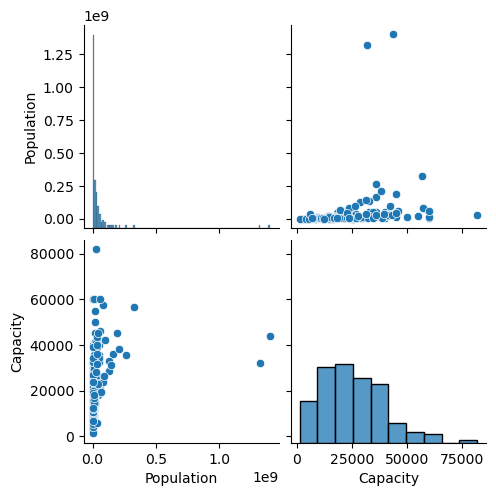

In [172]:
sns.pairplot(mm)

from the plots above, I can see that there is no linear relationship between the average capacities of the stadiums in a country and the population of the country.

                              STATISTICAL TESTS 

In [143]:
from scipy.stats import pearsonr
from scipy.stats import ttest_ind, f_oneway
from sklearn.linear_model import LinearRegression

In [148]:
#HYPOTHESIS TESTS
#first test is to compare average stadium sizes across different confederations

uefa_cap = stad[stad['Confederation'] == 'UEFA']['Capacity']
caf_cap = stad[stad['Confederation'] == 'CAF']['Capacity']
conmebol_cap = stad[stad['Confederation'] == 'CONMEBOL']['Capacity']
afc_cap = stad[stad['Confederation'] == 'AFC']['Capacity']

#i will be using the one way Anova test to compare the means across the confederations
res1 = f_oneway(uefa_cap, caf_cap, conmebol_cap, afc_cap)
print(res1)

F_onewayResult(statistic=140.67104929570053, pvalue=5.298525872655374e-82)


for this test, H0 = The four continents have the same mean stadium capacities
               H1 = The mean stadium capacities are different.
               
from the results of the test, we reject the null hypothesis becuase the p values is too small and the F-statistics is very big which is more evidence against the null hypothesis. This therefore means that the mean stadium capacities are different for the confederations


In [185]:
#T-test to check the relationship between capacity and population
cappop = ttest_ind(stad['Capacity'], stad['Population'])
print (cappop)

TtestResult(statistic=-19.26855545581496, pvalue=3.1655484566765177e-79, df=4046.0)


In [186]:
pearsonr(stad['Population'], stad['Capacity'])

PearsonRResult(statistic=0.3211246766919139, pvalue=9.002743382538361e-50)

The tests I have done, shows that there is no linear relationship between the population and the stadium capacity. 

I will still perfrom a linear regression test to verify.

In [187]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [189]:
x = stad['Population']
x = sm.add_constant(x)
y = stad['Capacity']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Capacity   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     232.5
Date:                Sun, 10 Dec 2023   Prob (F-statistic):           9.00e-50
Time:                        11:41:31   Log-Likelihood:                -22878.
No. Observations:                2024   AIC:                         4.576e+04
Df Residuals:                    2022   BIC:                         4.577e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.005e+04    474.835     42.233      0.000    1.91e+04     2.1e+04
Population  2.862e-05   1.88e-06     15.247      0.000    2.49e-05    3.23e-05
==============================================================================
Omnibus:                      491.717   Durbin-Watson:                   1.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1085.992
Skew:                           1.369   Prob(JB):                    1.51e-236
Kurtosis:                       5.320   Cond. No.                     2.75e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

explanation:

R-squared: from the r-squared value, only 10% of the variability in the capacity is explained by the population variable
    P-values: both the intercept and the population coefficient have small p-values, which therefore proves that they are statistically significant. 
In conclusion, this model shows that the population is statistically siginificant to the stadium capacity and as a result of the r squared value, I can say that there are other factors also responsible for the capacity that is not included in the model and in the dataset. 